# Loading libraries and data

In [1]:
#We'll start our analysis with loading the necessary libraries. 
import pandas as pd
from fastparquet import ParquetFile
import numpy as np
from copy import copy
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns
import random
from tqdm import tqdm 
import scipy.stats as stat

In [2]:
#Loading the data this way is much more faster than loading with pd.read_parquet()
pf = ParquetFile('/Users/hichamelkaissi/Downloads/336_v4_train.parquet')
for train in pf.iter_row_groups():
    print(train.shape)

(2420521, 1214)


In [3]:
#Peeking at the first 5 rows from our train data
train.head()

,era,data_type,feature_honoured_observational_balaamite,feature_polaroid_vadose_quinze,feature_untidy_withdrawn_bargeman,feature_genuine_kyphotic_trehala,feature_unenthralled_sportful_schoolhouse,feature_divulsive_explanatory_ideologue,feature_ichthyotic_roofed_yeshiva,feature_waggly_outlandish_carbonisation,...,target_paul_v4_20,target_paul_v4_60,target_george_v4_20,target_george_v4_60,target_william_v4_20,target_william_v4_60,target_arthur_v4_20,target_arthur_v4_60,target_thomas_v4_20,target_thomas_v4_60
id,,,,,,,,,,,,,,,,,,,,,
n003bba8a98662e4,0001,train,1.0,0.50,1.00,1.00,0.00,0.00,1.00,1.00,...,0.50,0.25,0.25,0.00,0.333333,0.000000,0.500000,0.500000,0.166667,0.000000
n003bee128c2fcfc,0001,train,0.5,1.00,0.25,0.75,0.00,0.75,0.50,0.75,...,0.75,1.00,1.00,1.00,0.666667,0.666667,0.833333,0.666667,0.833333,0.666667
n0048ac83aff7194,0001,train,0.5,0.25,0.75,0.00,0.75,0.00,0.75,0.75,...,0.50,0.25,0.25,0.25,0.500000,0.333333,0.333333,0.500000,0.500000,0.333333
n00691bec80d3e02,0001,train,1.0,0.50,0.50,0.75,0.00,1.00,0.25,1.00,...,0.50,0.50,0.50,0.50,0.666667,0.500000,0.500000,0.500000,0.666667,0.500000
n00b8720a2fdc4f2,0001,train,1.0,0.75,1.00,1.00,0.00,0.00,1.00,0.50,...,0.50,0.50,0.50,0.50,0.666667,0.500000,0.666667,0.500000,0.666667,0.500000


In [4]:
#Number of unique eras
train.era.nunique()

574

In [5]:
#We have 1191 features
features = [f for f in train.columns if f.startswith('feature_')]
print('The number of features is:', len(features))

The number of features is: 1191


In [6]:
print('The first 5 features:')
features[:5]

The first 5 features:


['feature_honoured_observational_balaamite',
 'feature_polaroid_vadose_quinze',
 'feature_untidy_withdrawn_bargeman',
 'feature_genuine_kyphotic_trehala',
 'feature_unenthralled_sportful_schoolhouse']

In [7]:
#We have 21 targets
targets = [t for t in train.columns if t.startswith('target')]
print('The number of target variables is:', len(targets))

The number of target variables is: 21


There are 21 targets. The one on which we are scored additional targets. Per Numerai scripts, some targets are better at pedicting the main target than the the main target itself. So, it is strongly advised to experiment with multiple targets. 

In [8]:
print('The first 5 targets:')
targets[:5]

The first 5 targets:


['target',
 'target_nomi_v4_20',
 'target_nomi_v4_60',
 'target_jerome_v4_20',
 'target_jerome_v4_60']

In [9]:
train['erano'] = train['era'].astype(int)

Each era contains a different number of observations. Furthermore, eras are overlapped. Consequently, you should use purged CV as a standard CV will give over-optimistic results. 

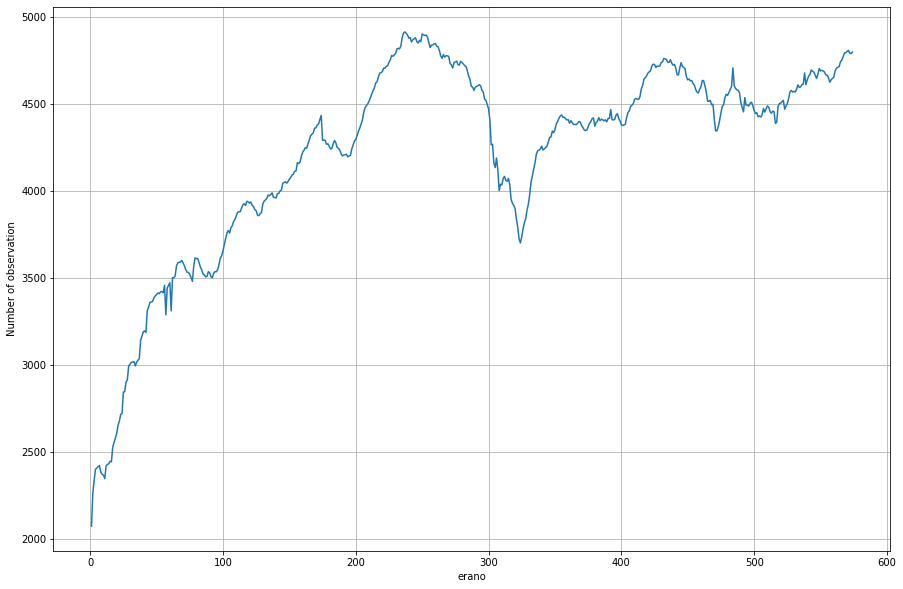

In [10]:
plt.figure(figsize=(15, 10))
train.groupby('erano').size().plot()
plt.ylabel('Number of observation')
plt.grid(True);

# Targets

In [11]:
#Target is binned.
train['target'].unique()

array([0.25, 0.75, 0.5 , 0.  , 1.  ], dtype=float32)

In [12]:
train[targets].describe()

,target,target_nomi_v4_20,target_nomi_v4_60,target_jerome_v4_20,target_jerome_v4_60,target_janet_v4_20,target_janet_v4_60,target_ben_v4_20,target_ben_v4_60,target_alan_v4_20,...,target_paul_v4_20,target_paul_v4_60,target_george_v4_20,target_george_v4_60,target_william_v4_20,target_william_v4_60,target_arthur_v4_20,target_arthur_v4_60,target_thomas_v4_20,target_thomas_v4_60
count,2.420521e+06,2.420521e+06,2.420521e+06,2.409951e+06,2.391506e+06,2.409951e+06,2.391506e+06,2.411771e+06,2.395519e+06,2.411771e+06,...,2.409951e+06,2.391506e+06,2.411771e+06,2.395519e+06,2.409951e+06,2.391506e+06,2.409951e+06,2.391506e+06,2.411771e+06,2.395519e+06
mean,5.000010e-01,5.000010e-01,4.999982e-01,4.999918e-01,4.999975e-01,5.000141e-01,5.000047e-01,5.000106e-01,4.999998e-01,5.000069e-01,...,4.995543e-01,4.991860e-01,4.987555e-01,4.985601e-01,5.047721e-01,5.057657e-01,5.003674e-01,5.007439e-01,4.998152e-01,4.998610e-01
std,2.236147e-01,2.236147e-01,2.236051e-01,2.235540e-01,2.235682e-01,2.228435e-01,2.227687e-01,2.222950e-01,2.223097e-01,2.167429e-01,...,2.230960e-01,2.228404e-01,2.221958e-01,2.221896e-01,1.993793e-01,1.972146e-01,1.712154e-01,1.682939e-01,1.805823e-01,1.782331e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.500000e-01,2.500000e-01,5.000000e-01,2.500000e-01,2.500000e-01,5.000000e-01,5.000000e-01,5.000000e-01,5.000000e-01,5.000000e-01,...,5.000000e-01,5.000000e-01,5.000000e-01,5.000000e-01,3.333333e-01,3.333333e-01,3.333333e-01,3.333333e-01,3.333333e-01,3.333333e-01
50%,5.000000e-01,5.000000e-01,5.000000e-01,5.000000e-01,5.000000e-01,5.000000e-01,5.000000e-01,5.000000e-01,5.000000e-01,5.000000e-01,...,5.000000e-01,5.000000e-01,5.000000e-01,5.000000e-01,5.000000e-01,5.000000e-01,5.000000e-01,5.000000e-01,5.000000e-01,5.000000e-01
75%,7.500000e-01,7.500000e-01,5.000000e-01,5.000000e-01,5.000000e-01,5.000000e-01,5.000000e-01,5.000000e-01,5.000000e-01,5.000000e-01,...,5.000000e-01,5.000000e-01,5.000000e-01,5.000000e-01,6.666667e-01,6.666667e-01,5.000000e-01,5.000000e-01,6.666667e-01,6.666667e-01
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [13]:
#The main target contains no missing values.
train[targets].isna().sum()

target                      0
target_nomi_v4_20           0
target_nomi_v4_60           0
target_jerome_v4_20     10570
target_jerome_v4_60     29015
target_janet_v4_20      10570
target_janet_v4_60      29015
target_ben_v4_20         8750
target_ben_v4_60        25002
target_alan_v4_20        8750
target_alan_v4_60       25002
target_paul_v4_20       10570
target_paul_v4_60       29015
target_george_v4_20      8750
target_george_v4_60     25002
target_william_v4_20    10570
target_william_v4_60    29015
target_arthur_v4_20     10570
target_arthur_v4_60     29015
target_thomas_v4_20      8750
target_thomas_v4_60     25002
dtype: int64

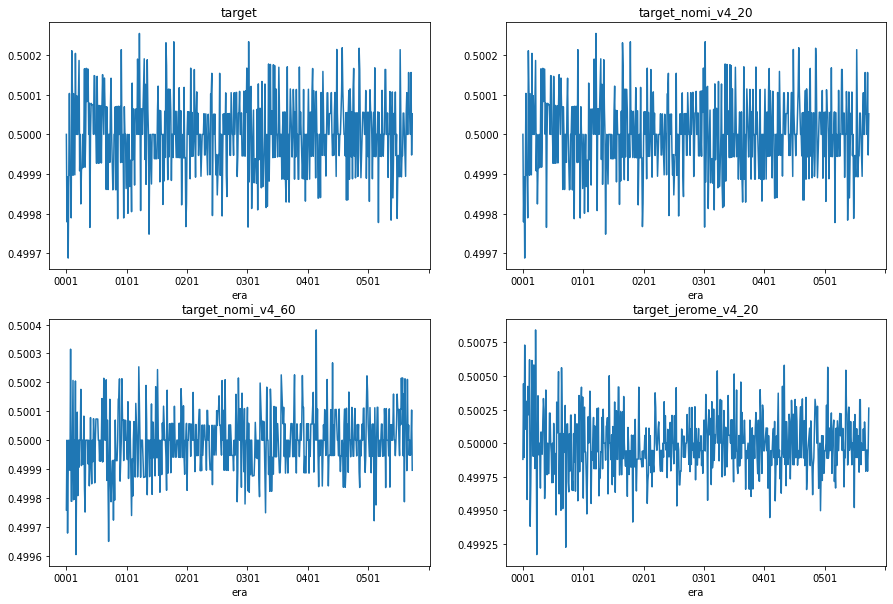

In [14]:
fig = plt.figure(figsize=(15,10))
for i, col in enumerate(targets[:4]):
    ax = fig.add_subplot(2, 2, i+1)
    train.groupby('era')[col].mean().plot()
    ax.set_title(f'{col}')

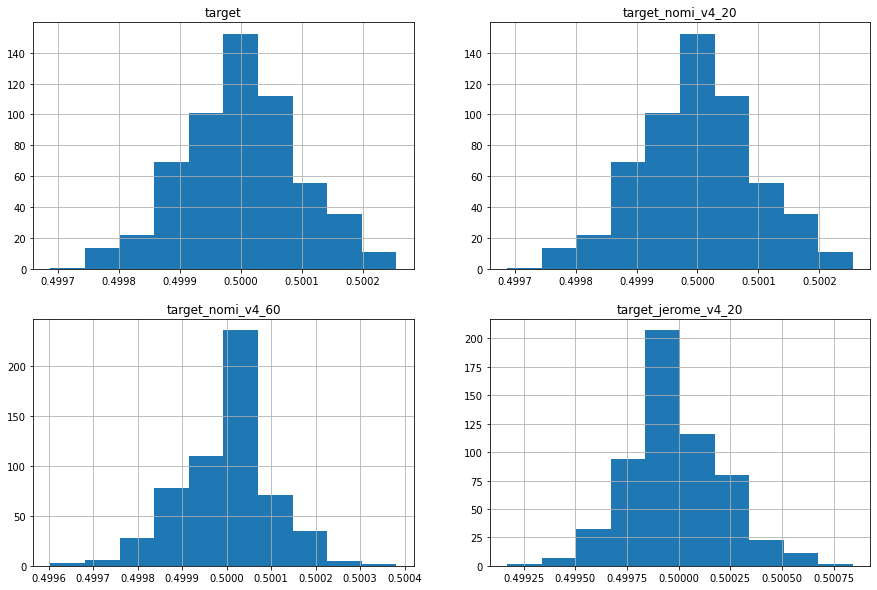

In [15]:
#Some targets are skewed.
fig = plt.figure(figsize=(15,10))
for i, col in enumerate(targets[:4]):
    ax = fig.add_subplot(2, 2, i+1)
    train.groupby('era')[col].mean().hist()
    ax.set_title(f'{col}')

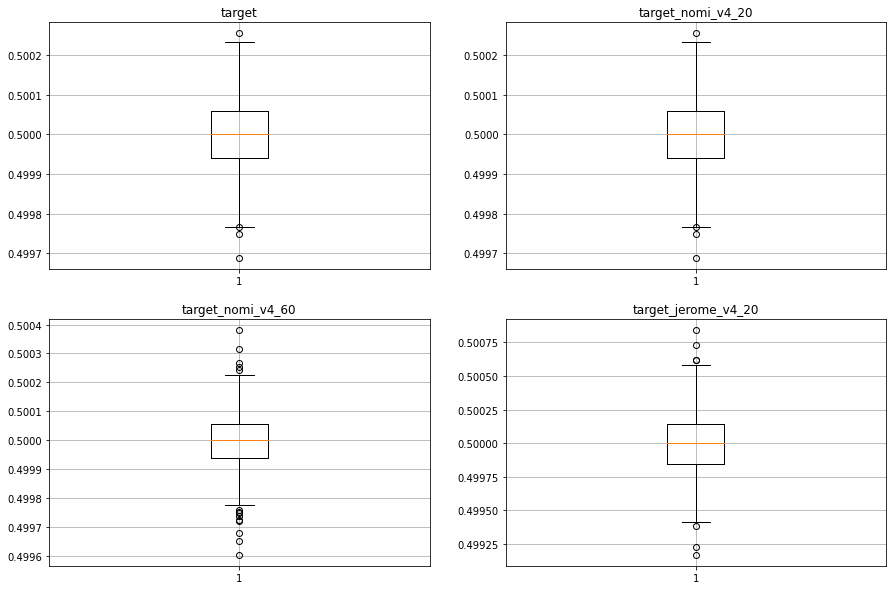

In [16]:
#We can see that are are some outliers. Outlier treatment is a must for optimal results. 
fig = plt.figure(figsize=(15,10))
for i, col in enumerate(targets[:4]):
    ax = fig.add_subplot(2, 2, i+1)
    plt.boxplot(train.groupby('era')[col].mean())
    ax.set_title(f'{col}')
    ax.grid(True)

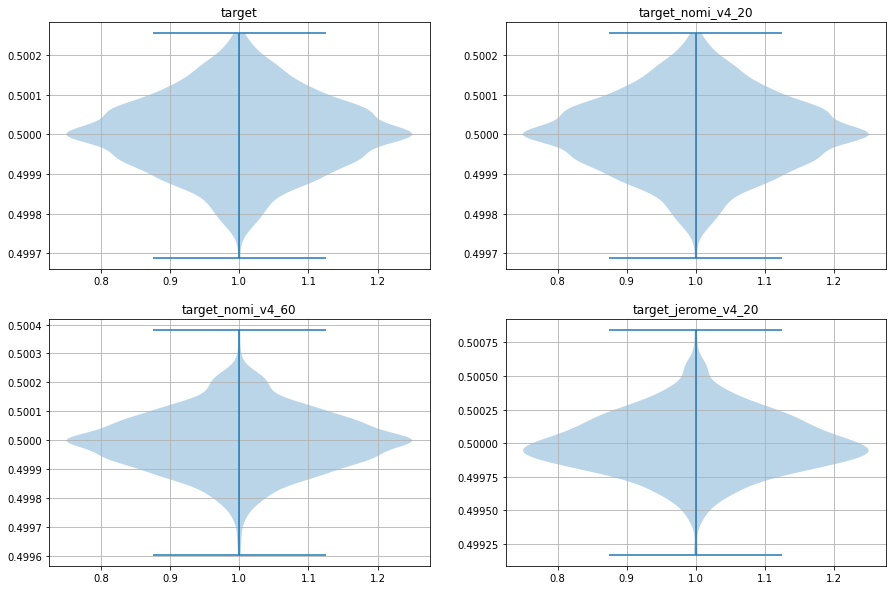

In [17]:
#The violin plots. 
fig = plt.figure(figsize=(15,10))
for i, col in enumerate(targets[:4]):
    ax = fig.add_subplot(2, 2, i+1)
    plt.violinplot(train.groupby('era')[col].mean())
    ax.set_title(f'{col}')
    ax.grid(True)

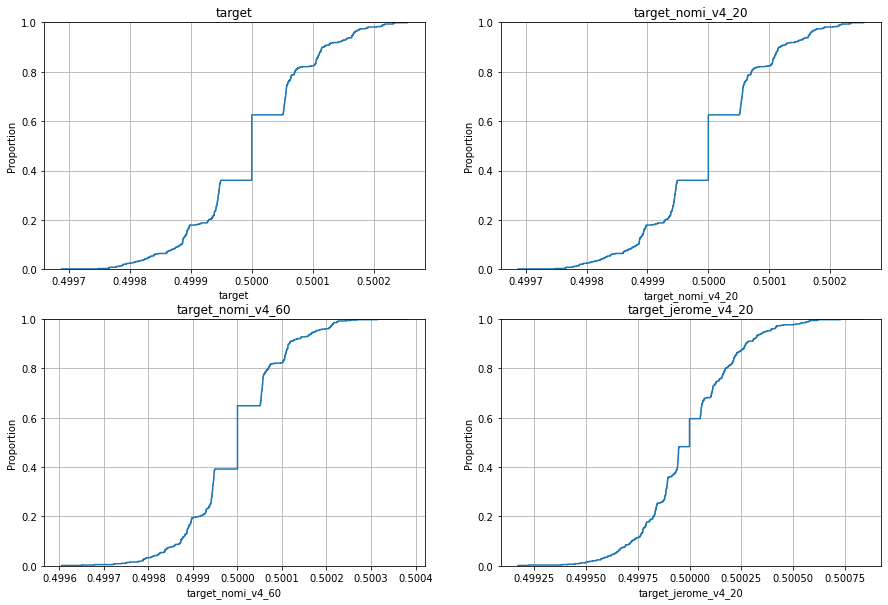

In [18]:
fig = plt.figure(figsize=(15,10))
for i, col in enumerate(targets[:4]):
    ax = fig.add_subplot(2, 2, i+1)
    sns.ecdfplot(train.groupby('era')[col].mean())
    ax.set_title(f'{col}')
    ax.grid(True)

In [19]:
#The evolution of ecdf plot
era_lim_train = train[(train['era'] == '0001') | (train['era'] == '0150') | (train['era'] == '0243') | (train['era'] == '0574')]

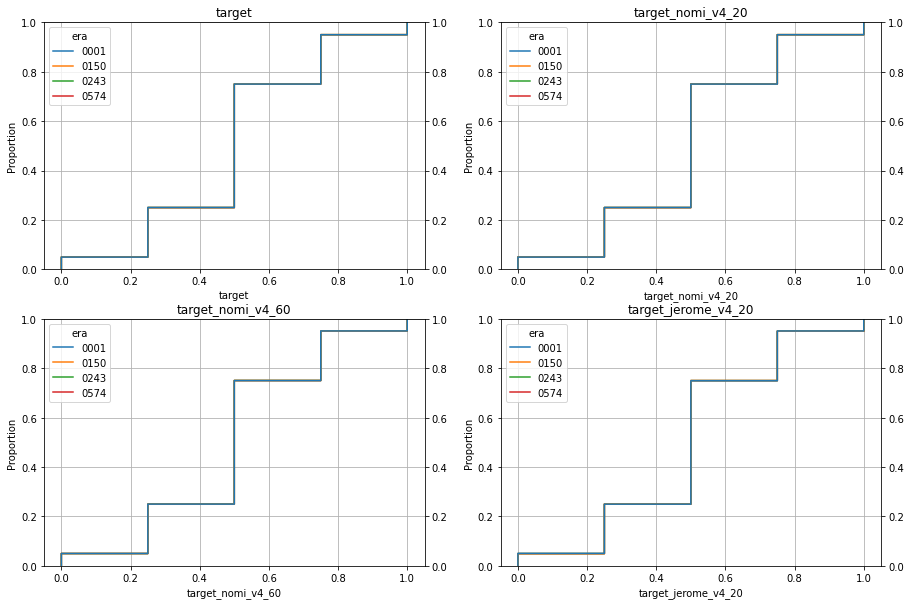

In [20]:
#The ECDF plot does not change over time.
fig = plt.figure(figsize=(15,10))
for i, col in enumerate(targets[:4]):
    ax = fig.add_subplot(2, 2, i+1)
    sns.ecdfplot(x=col, hue='era', data=era_lim_train)
    ax.set_title(f'{col}')
    ax.grid(True)
    ax.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=True,
                     bottom=True, top=False, left=True, right=True)

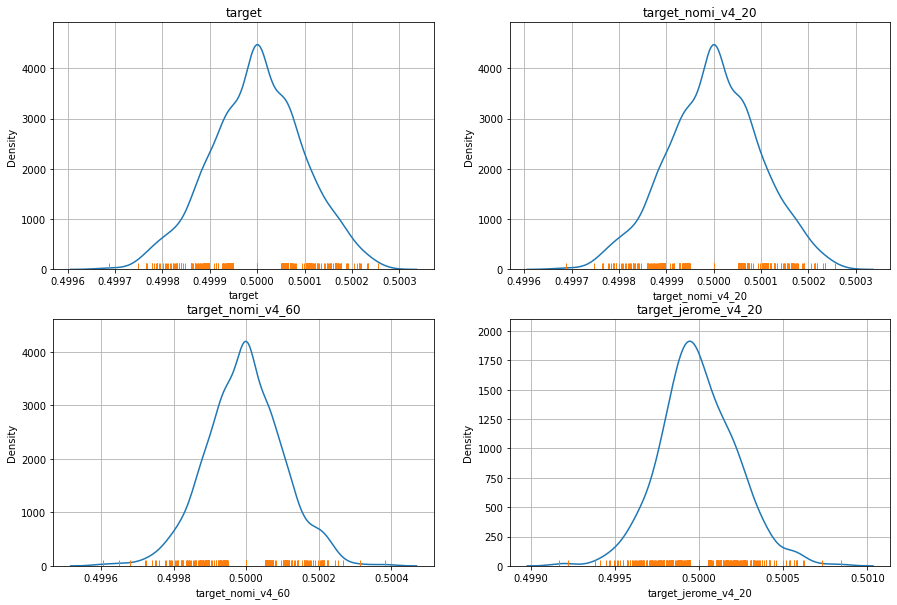

In [21]:
#We can see that there is some concentration of observations. That's maybe due to binning. 
fig = plt.figure(figsize=(15,10))
for i, col in enumerate(targets[:4]):
    ax = fig.add_subplot(2, 2, i+1)
    sns.kdeplot(train.groupby('era')[col].mean())
    sns.rugplot(train.groupby('era')[col].mean())
    ax.set_title(f'{col}')
    ax.grid(True)
    

In [22]:
#Another proof of concentration of values. 
train.groupby('target').size()/len(train)

target
0.00    0.050007
0.25    0.200001
0.50    0.499975
0.75    0.200014
1.00    0.050003
dtype: float64

In [23]:
print(train.groupby('target_william_v4_20').size()/len(train))
print()
print(train.groupby('target_arthur_v4_20').size()/len(train))

target_william_v4_20
0.000000    0.023195
0.166667    0.059765
0.333333    0.218543
0.500000    0.387231
0.666667    0.209928
0.833333    0.064677
1.000000    0.032295
dtype: float64

target_arthur_v4_20
0.000000    0.012967
0.166667    0.052148
0.333333    0.186911
0.500000    0.497207
0.666667    0.177703
0.833333    0.051491
1.000000    0.017206
dtype: float64


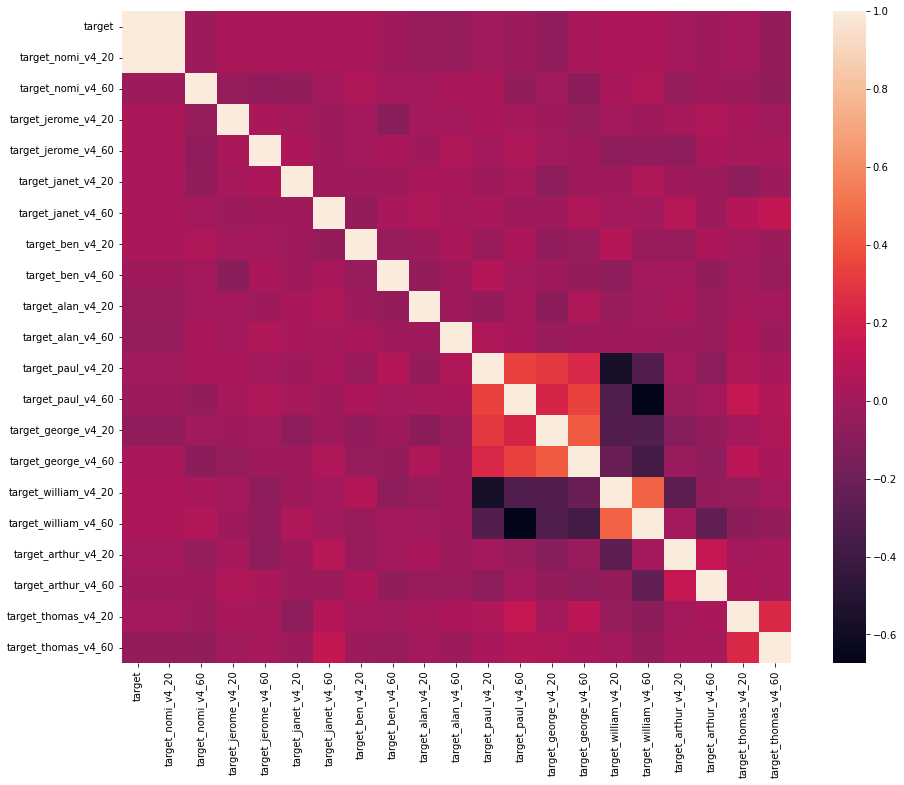

In [24]:
#Some targets are highly correlated some are not. 
plt.figure(figsize=(15, 12))
sns.heatmap(train.groupby('era')[targets].mean().corr());

<Figure size 1080x864 with 0 Axes>

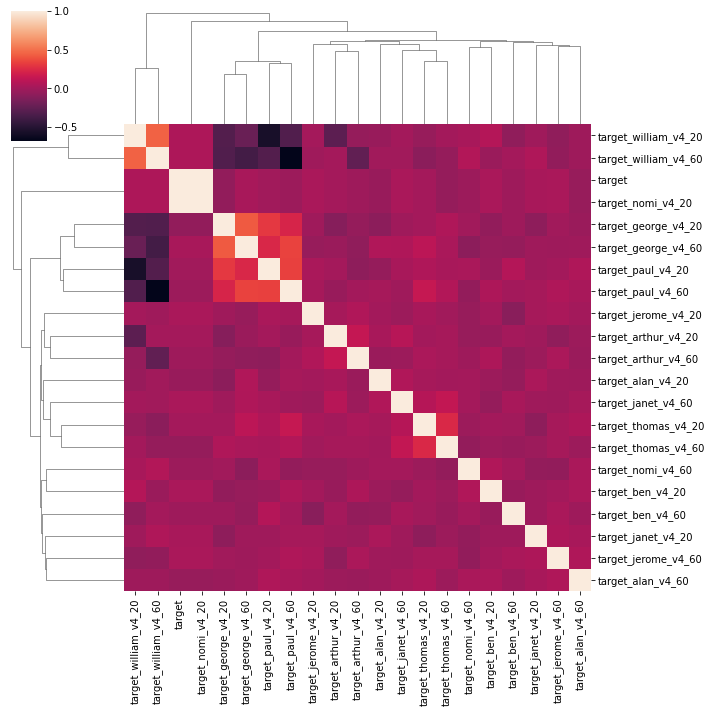

In [25]:
plt.figure(figsize=(15, 12))
sns.clustermap(train.groupby('era')[targets].mean().corr());

# Features

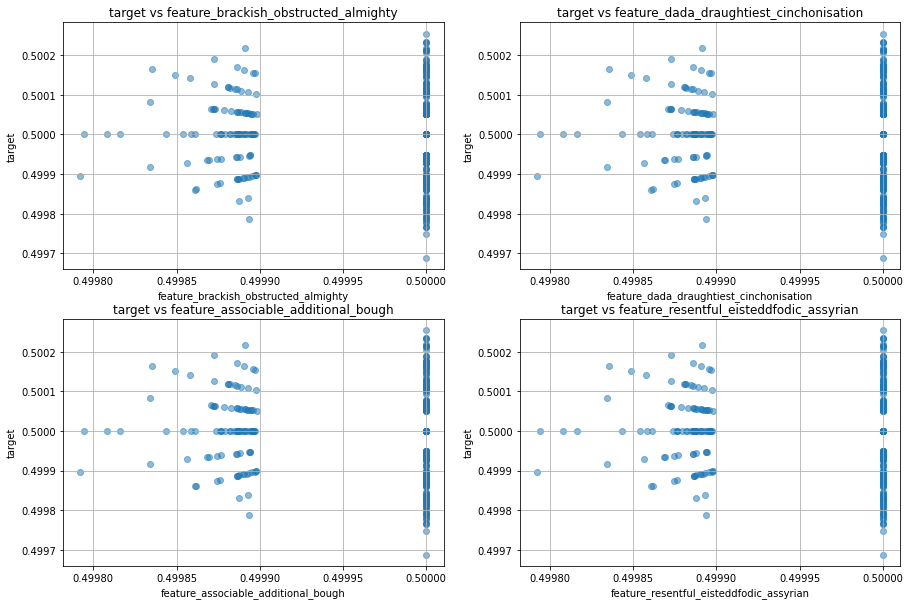

In [26]:
#Scatter plots. 
fig = plt.figure(figsize=(15,10))
for i, col in enumerate(random.sample(features, 4)):
    ax = fig.add_subplot(2, 2, i+1)
    plt.scatter(train.groupby('era')[col].mean(), train.groupby('era')['target'].mean(), alpha=.5)
    ax.set_title(f'target vs {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('target')
    ax.grid(True)

In [27]:
#Features are binned too.
train[random.choice(features)].unique()

array([1.  , 0.75, 0.5 , 0.  , 0.25], dtype=float32)

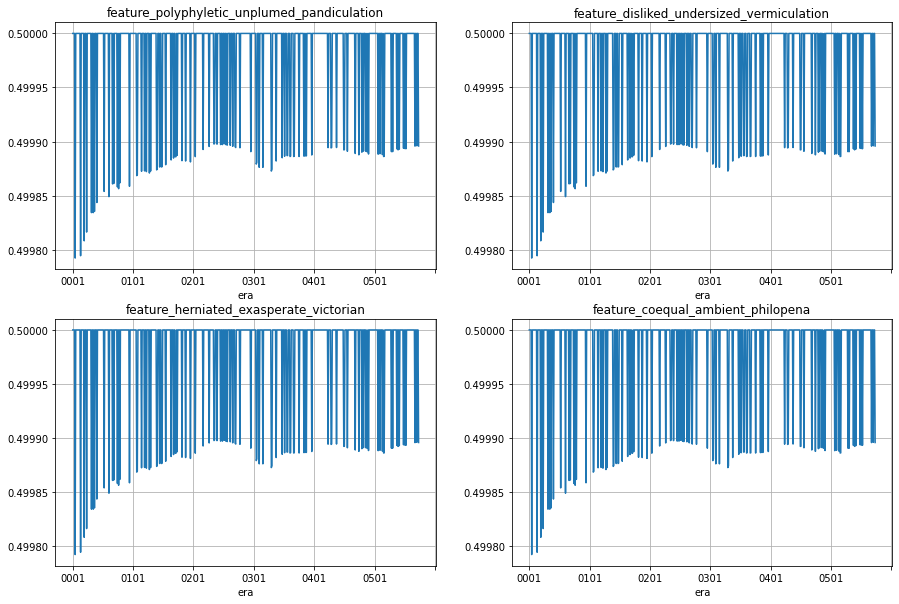

In [29]:
fig = plt.figure(figsize=(15,10))
for i, col in enumerate(random.sample(features, 4)):
    ax = fig.add_subplot(2, 2, i+1)
    train.groupby('era')[col].mean().plot()
    ax.set_title(f'{col}')
    ax.grid(True)

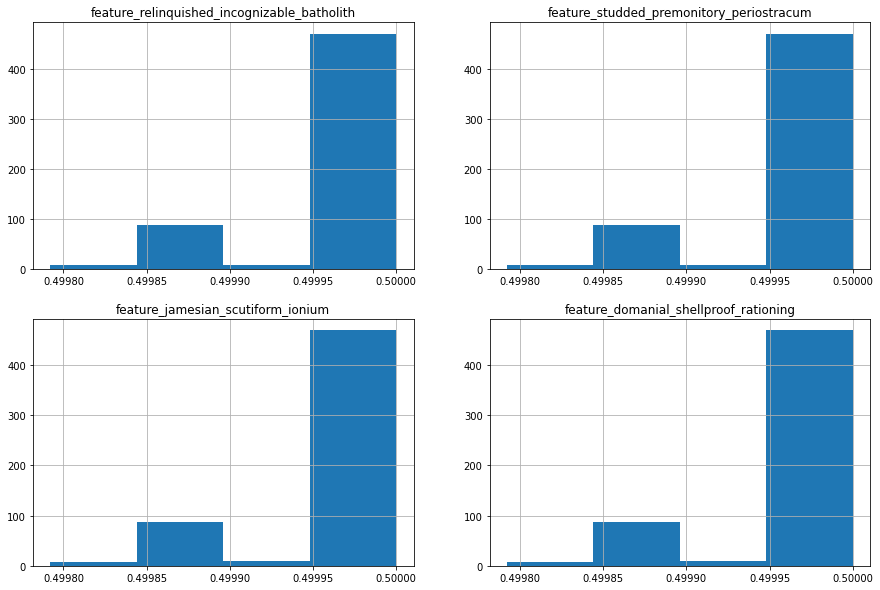

In [30]:
#Bimodal ditribution.
fig = plt.figure(figsize=(15,10))
for i, col in enumerate(random.sample(features, 4)):
    ax = fig.add_subplot(2, 2, i+1)
    train.groupby('era')[col].mean().hist(bins=4)
    ax.set_title(f'{col}')

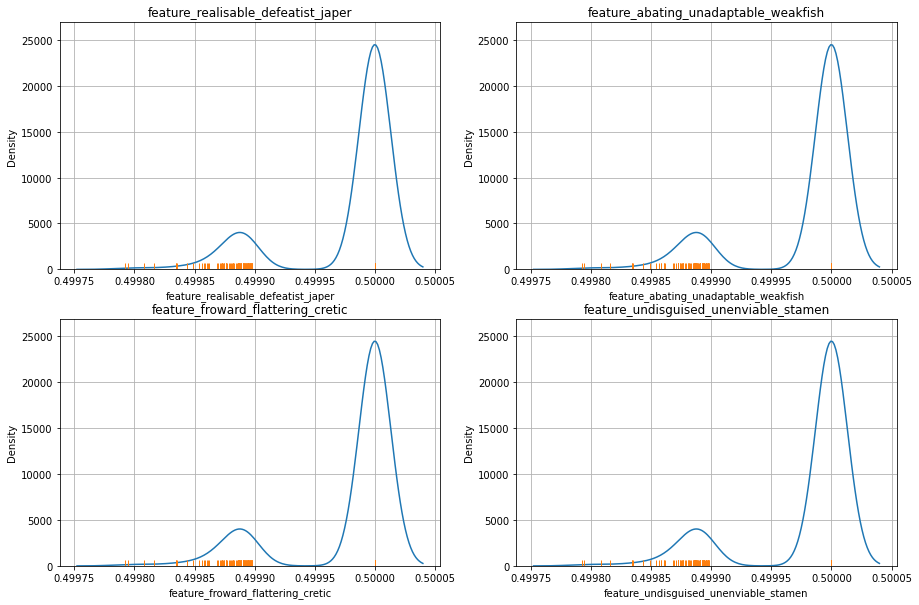

In [31]:
#Another indicator that the distribution is bimodal. We can see that the observations are concentrated.
fig = plt.figure(figsize=(15,10))
for i, col in enumerate(random.sample(features, 4)):
    ax = fig.add_subplot(2, 2, i+1)
    sns.kdeplot(train.groupby('era')[col].mean())
    sns.rugplot(train.groupby('era')[col].mean())
    ax.set_title(f'{col}')
    ax.grid(True)

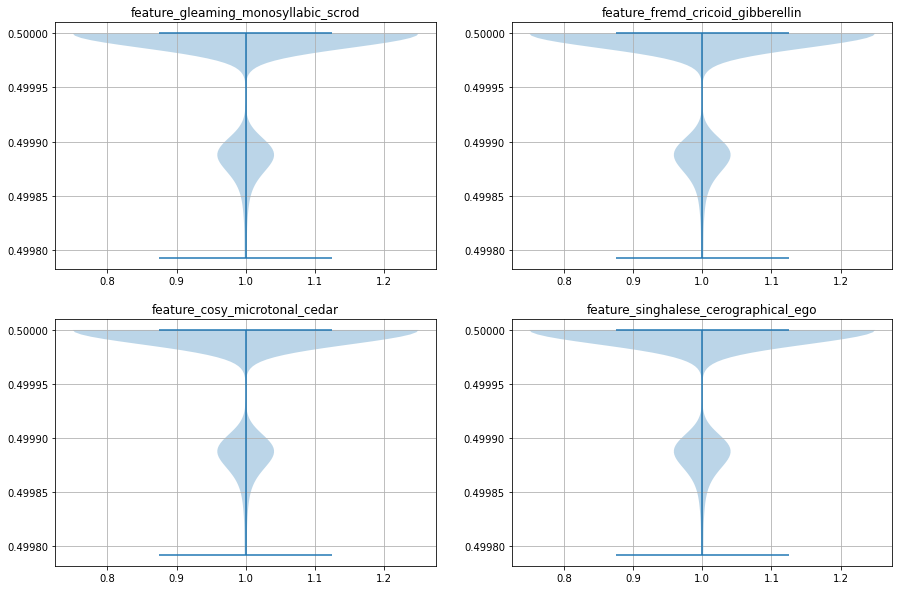

In [32]:
#Violin plots. 
fig = plt.figure(figsize=(15,10))
for i, col in enumerate(random.sample(features, 4)):
    ax = fig.add_subplot(2, 2, i+1)
    plt.violinplot(train.groupby('era')[col].mean())
    ax.set_title(f'{col}')
    ax.grid(True)

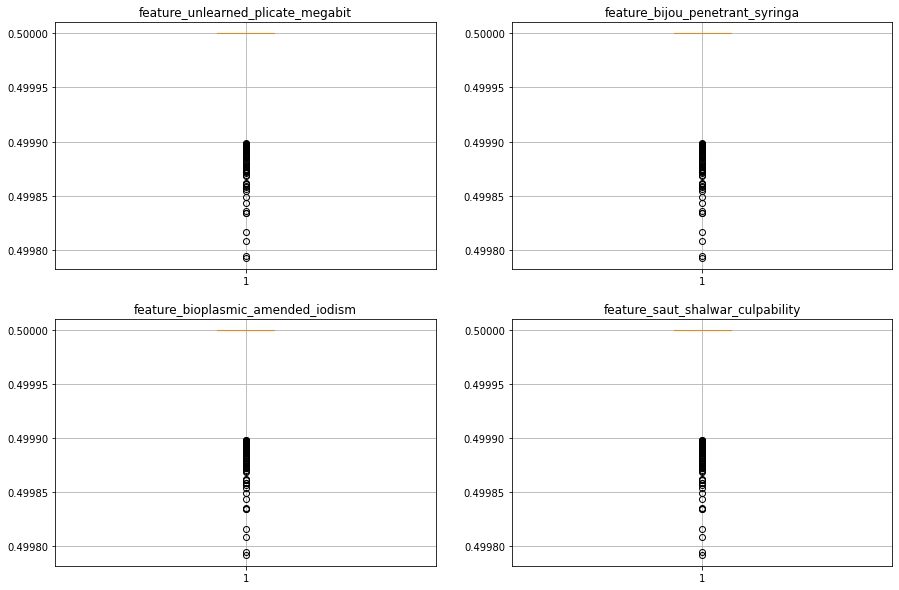

In [33]:
#We need oulier treatment. 
fig = plt.figure(figsize=(15,10))
for i, col in enumerate(random.sample(features, 4)):
    ax = fig.add_subplot(2, 2, i+1)
    plt.boxplot(train.groupby('era')[col].mean())
    ax.set_title(f'{col}')
    ax.grid(True)

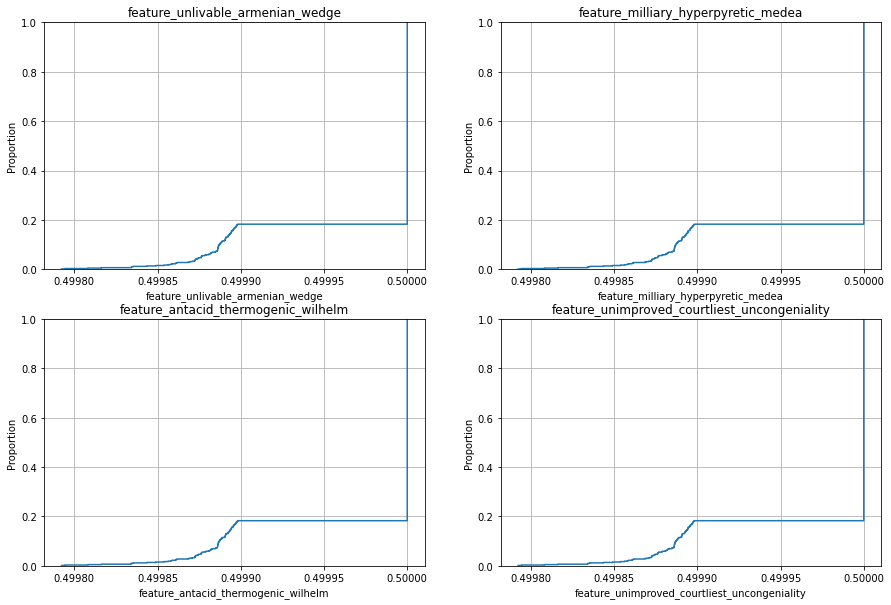

In [34]:
fig = plt.figure(figsize=(15,10))
for i, col in enumerate(random.sample(features, 4)):
    ax = fig.add_subplot(2, 2, i+1)
    sns.ecdfplot(train.groupby('era')[col].mean())
    ax.set_title(f'{col}')
    ax.grid(True)

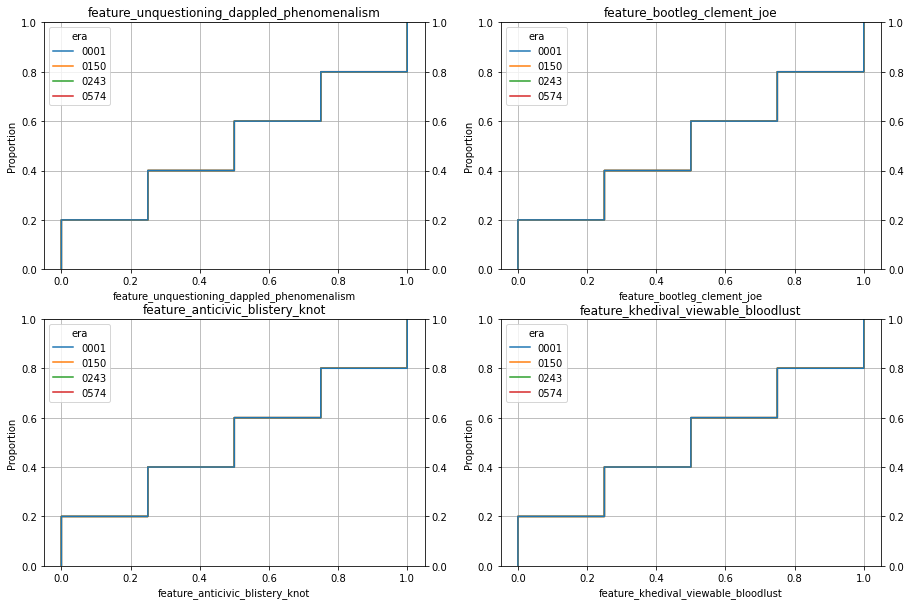

In [35]:
#The ECDF plots do not chnage over eras. 
fig = plt.figure(figsize=(15,10))
for i, col in enumerate(random.sample(features, 4)):
    ax = fig.add_subplot(2, 2, i+1)
    sns.ecdfplot(x=col, hue='era', data=era_lim_train)
    ax.set_title(f'{col}')
    ax.grid(True)
    ax.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=True,
                     bottom=True, top=False, left=True, right=True)

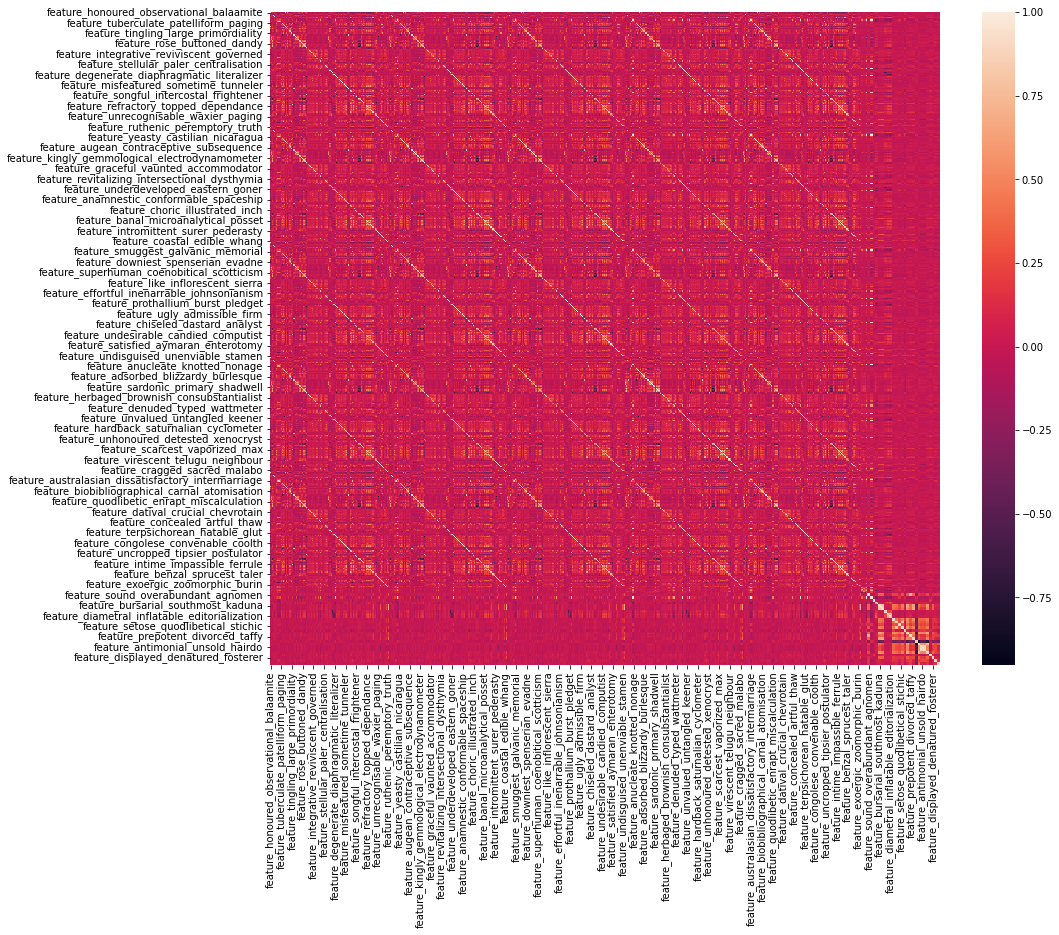

In [36]:
#Some features are highly correlated. However, we need to examine if correlation changses over eras. 
plt.figure(figsize=(15, 12))
sns.heatmap(train[train.era=='0001'][features].corr())
plt.show()

/Users/hichamelkaissi/opt/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 1080x864 with 0 Axes>

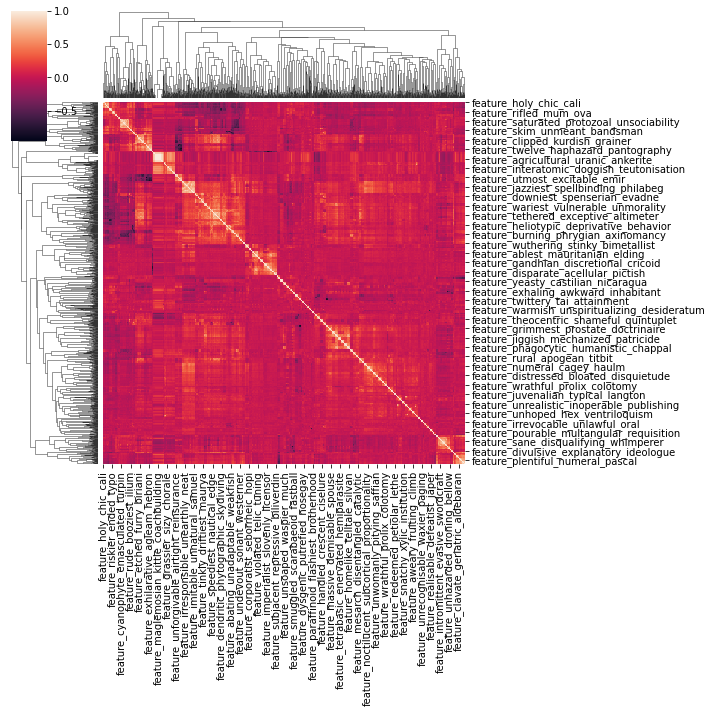

In [37]:
plt.figure(figsize=(15, 12))
sns.clustermap(train[train.era=='0001'][features].corr());

In [38]:
features_era1_corr = train[train['era'] == '0001'][features].corr()

In [39]:
#The pair feature_agricultural_uranic_ankerite and feature_weightiest_protozoic_brawler are perfectly correlated. 
cordf = features_era1_corr.stack()
cordf = cordf[cordf.index.get_level_values(0) < cordf.index.get_level_values(1)].sort_values(ascending=False)
cordf

feature_agricultural_uranic_ankerite      feature_weightiest_protozoic_brawler     1.000000
feature_healthier_unconnected_clave       feature_unscaling_pedantic_fingernail    1.000000
feature_maglemosian_kittle_coachbuilding  feature_stylolitic_brown_spume           1.000000
feature_bimanual_godly_witloof            feature_uranian_gorier_melancholy        1.000000
                                          feature_wounded_crook_gargoylism         1.000000
                                                                                     ...   
feature_sodding_choosy_eruption           feature_utmost_excitable_emir           -0.934667
feature_applausive_forgettable_mishanter  feature_marled_coliform_proctorship     -0.936837
feature_dissident_templed_shippon         feature_rose_buttoned_dandy             -0.939489
feature_careworn_motivational_requisite   feature_loftier_sightly_lyric           -0.940453
feature_optic_mycelial_whimper            feature_productile_auriform_fil       

In [40]:
pairs = list(cordf.index)

In [41]:
def corr_over_eras(feats):
    corrs = {}
    for i in tqdm(np.arange(1, 575)):
        corrs[f'era{i}'] = stat.pearsonr(train[train.erano == i][feats[0]], train[train.erano == i][feats[1]])[0]
    
    return corrs

Let's examine the correlation of the pair feature_agricultural_uranic_ankerite and feature_weightiest_protozoic_brawler over time. 

100%|██████████| 574/574 [01:08<00:00,  8.39it/s]


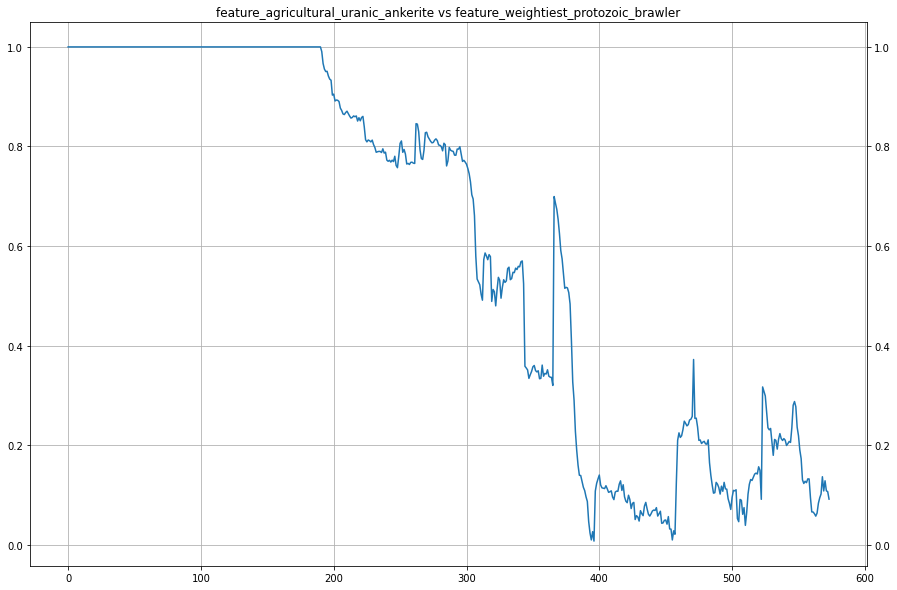

In [42]:
#The observations in the first 191 eras are perfectly correlated but not the rest. 
fig = plt.figure(figsize=(15,10))
corrs1 = corr_over_eras(pairs[0])
plt.plot(corrs1.values())
plt.grid(True)
plt.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=True,
                bottom=True, top=False, left=True, right=True)
plt.title(f'{pairs[0][0]} vs {pairs[0][1]}');

100%|██████████| 574/574 [00:51<00:00, 11.07it/s]


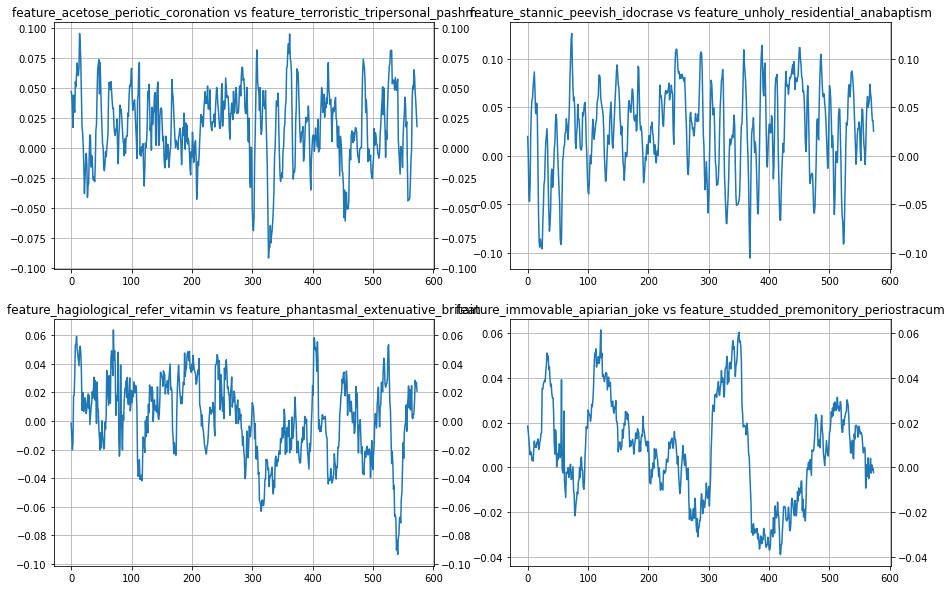

In [43]:
#Correlation over eras for 4 randoms pairs of features.
fig = plt.figure(figsize=(15,10))
for i, pair in enumerate(random.sample(pairs, 4)):
    corr = corr_over_eras(pair)
    ax = fig.add_subplot(2, 2, i+1)
    plt.plot(corr.values())
    ax.set_title(f'{pair[0]} vs {pair[1]}')
    ax.grid(True)
    ax.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=True,
                     bottom=True, top=False, left=True, right=True)

If the correlation of a pair of features is over 0.95 for 50% of the eras, we can conclude the correlation is persistent.  

In [44]:
#corrs1 = corr_over_eras(pairs[0])
corrs1 = np.abs(np.array(list(corrs1.values())))
detect = []
for c in corrs1:
    if c >= 0.95:
        detect.append(c)
if len(detect)/len(corrs1) > .5:
    print('The correlation of the pair', pairs[0], 'is persistent')
else:
    print('The correlation of the pair', pairs[0], 'is not persistent')

The correlation of the pair ('feature_agricultural_uranic_ankerite', 'feature_weightiest_protozoic_brawler') is not persistent


However, this way, we igone the order of eras. And also, the correlation in the last eras may matter more than the correlation in the first eras. In the following script, we will consider better alternatives. Those alternatives will help us remove unnecessary features.  